In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


> **Importing Libs**

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler 
from sklearn.impute import SimpleImputer
import math
import warnings
warnings.filterwarnings('ignore')

> **Loading files**

In [86]:
df_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
display(df_train.head(2))
df_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
display(df_test.head(2))
print(df_train.shape)
print(df_test.shape)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers


(8693, 14)
(4277, 13)


> **EDA**

In [87]:
for x in ['Cabin','HomePlanet','Destination','CryoSleep','Transported']:
    print(df_train[x].value_counts())
    print('-'*40)

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64
----------------------------------------
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
----------------------------------------
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
----------------------------------------
False    5439
True     3037
Name: CryoSleep, dtype: int64
----------------------------------------
True     4378
False    4315
Name: Transported, dtype: int64
----------------------------------------


In [88]:
df_train[["Deck", "Cabin_num", "Side"]] = df_train["Cabin"].str.split("/", expand=True)
df_test[["Deck", "Cabin_num", "Side"]] = df_test["Cabin"].str.split("/", expand=True)

for x in ['Deck','Cabin_num','Side']:
    print(df_train[x].value_counts())
    print('-'*40)

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Deck, dtype: int64
----------------------------------------
82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: Cabin_num, Length: 1817, dtype: int64
----------------------------------------
S    4288
P    4206
Name: Side, dtype: int64
----------------------------------------


In [89]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
Cabin_num       199
Side            199
dtype: int64

In [90]:
df_train.groupby(['HomePlanet','Destination']).agg({'PassengerId':np.size})

PassengerId
HomePlanet Destination               
Earth      55 Cancri e            690
           PSO J318.5-22          712
           TRAPPIST-1e           3101
Europa     55 Cancri e            886
           PSO J318.5-22           19
           TRAPPIST-1e           1189
Mars       55 Cancri e            193
           PSO J318.5-22           49
           TRAPPIST-1e           1475

In [91]:
df_train['HomePlanet'].fillna('Earth',inplace=True)
df_test['HomePlanet'].fillna('Earth',inplace=True)
df_train.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
Cabin_num       199
Side            199
dtype: int64

In [92]:
df_train['Destination'].fillna('TRAPPIST-1e',inplace=True)
df_test['Destination'].fillna('TRAPPIST-1e',inplace=True)
df_train.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination       0
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
Cabin_num       199
Side            199
dtype: int64

In [93]:
print(type(df_train['CryoSleep'][0]))
df_train.dtypes

<class 'bool'>


PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
Deck             object
Cabin_num        object
Side             object
dtype: object

In [94]:
df_train.groupby(['HomePlanet','Destination','CryoSleep']).agg({'PassengerId':np.size})

PassengerId
HomePlanet Destination   CryoSleep             
Earth      55 Cancri e   False              485
                         True               222
           PSO J318.5-22 False              348
                         True               363
           TRAPPIST-1e   False             2397
                         True               872
Europa     55 Cancri e   False              420
                         True               441
           PSO J318.5-22 False               10
                         True                 9
           TRAPPIST-1e   False              732
                         True               461
Mars       55 Cancri e   False              112
                         True                76
           PSO J318.5-22 False               36
                         True                11
           TRAPPIST-1e   False              899
                         True               582

In [95]:
ind_tr = df_train[(df_train['HomePlanet']=='Earth') & (df_train['Destination']=='PSO J318.5-22')].index
ind_te = df_test[(df_test['HomePlanet']=='Earth') & (df_test['Destination']=='PSO J318.5-22')].index
for x in ind_tr:
    if(df_train['CryoSleep'][x] is np.nan):
        df_train['CryoSleep'][x] = True

for x in ind_te:
    if(df_test['CryoSleep'][x] is np.nan):
        df_test['CryoSleep'][x] = True
print(df_train.isna().sum())
print('-'*40)
print(df_test.isna().sum())

PassengerId       0
HomePlanet        0
CryoSleep       200
Cabin           199
Destination       0
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
Cabin_num       199
Side            199
dtype: int64
----------------------------------------
PassengerId       0
HomePlanet        0
CryoSleep        86
Cabin           100
Destination       0
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
Deck            100
Cabin_num       100
Side            100
dtype: int64


In [96]:
ind1_tr = df_train[(df_train['HomePlanet']=='Europa') & (df_train['Destination']=='55 Cancri e')].index
ind1_te = df_test[(df_test['HomePlanet']=='Europa') & (df_test['Destination']=='55 Cancri e')].index
for x in ind1_tr:
    if(df_train['CryoSleep'][x] is np.nan):
        df_train['CryoSleep'][x] = True
        
for x in ind1_te:
    if(df_test['CryoSleep'][x] is np.nan):
        df_test['CryoSleep'][x] = True
print(df_train.isna().sum())
print('-'*40)
print(df_test.isna().sum())

PassengerId       0
HomePlanet        0
CryoSleep       175
Cabin           199
Destination       0
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
Cabin_num       199
Side            199
dtype: int64
----------------------------------------
PassengerId       0
HomePlanet        0
CryoSleep        79
Cabin           100
Destination       0
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
Deck            100
Cabin_num       100
Side            100
dtype: int64


In [97]:
df_train['CryoSleep'].fillna(False,inplace=True)
df_test['CryoSleep'].fillna(False,inplace=True)
print(df_train.isna().sum())
print('-'*40)
print(df_test.isna().sum())

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
Cabin_num       199
Side            199
dtype: int64
----------------------------------------
PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
Deck            100
Cabin_num       100
Side            100
dtype: int64


In [98]:
df_train.groupby(['HomePlanet','Destination','Transported']).agg({'PassengerId':np.size})

PassengerId
HomePlanet Destination   Transported             
Earth      55 Cancri e   False                352
                         True                 369
           PSO J318.5-22 False                363
                         True                 365
           TRAPPIST-1e   False               2034
                         True                1320
Europa     55 Cancri e   False                275
                         True                 611
           PSO J318.5-22 False                  5
                         True                  14
           TRAPPIST-1e   False                447
                         True                 779
Mars       55 Cancri e   False                 75
                         True                 118
           PSO J318.5-22 False                 27
                         True                  22
           TRAPPIST-1e   False                737
                         True                 780

In [99]:
df_train.groupby(['HomePlanet','Destination','CryoSleep','Transported']).agg({'PassengerId':np.size})

PassengerId
HomePlanet Destination   CryoSleep Transported             
Earth      55 Cancri e   False     False                303
                                   True                 196
                         True      False                 49
                                   True                 173
           PSO J318.5-22 False     False                236
                                   True                 112
                         True      False                127
                                   True                 253
           TRAPPIST-1e   False     False               1716
                                   True                 766
                         True      False                318
                                   True                 554
Europa     55 Cancri e   False     False                263
                                   True                 157
                         True      False                 12
                                   True                 454
           PSO J318.5-22 False     False                  5
                                   True                   5
                         True      True                   9
           TRAPPIST-1e   False     False                439
                                   True                 326
                         True      False                  8
                                   True                 453
Mars       55 Cancri e   False     False                 73
                                   True                  44
                         True      False                  2
                                   True                  74
           PSO J318.5-22 False     False                 26
                                   True                  12
                         True      False                  1
                                   True                  10
           TRAPPIST-1e   False     False                681
                                   True                 254
                         True      False                 56
                                   True                 526

In [100]:
df_train.groupby(['CryoSleep','Transported']).agg({'PassengerId':np.size})

PassengerId
CryoSleep Transported             
False     False               3742
          True                1872
True      False                573
          True                2506

> **Features Management**

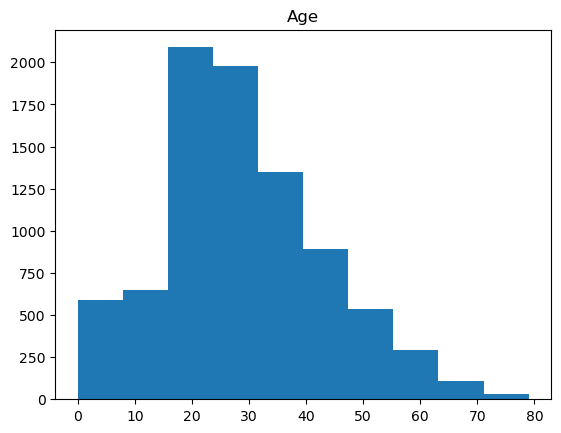

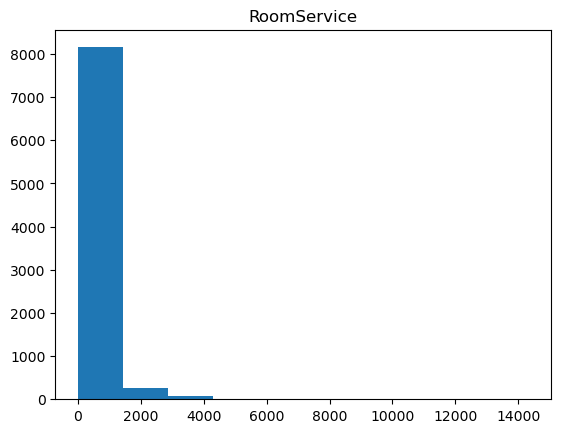

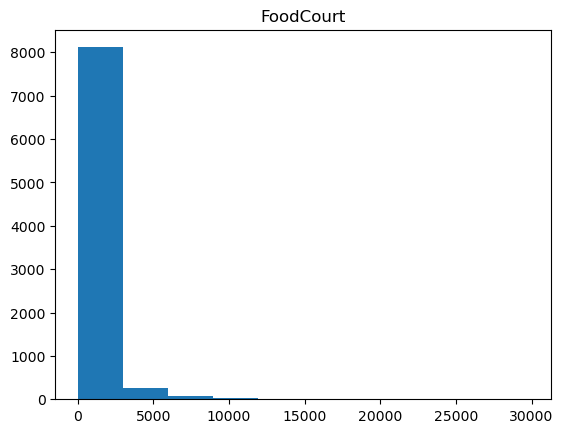

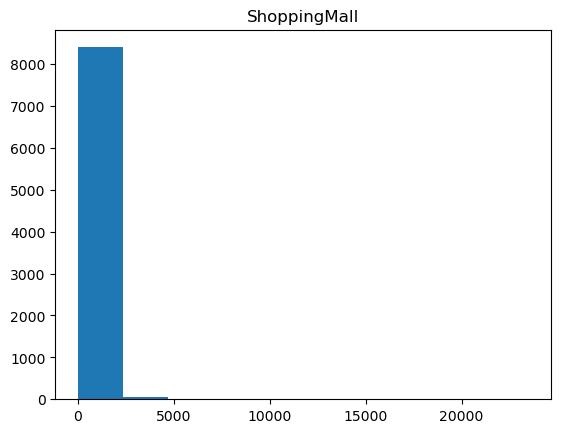

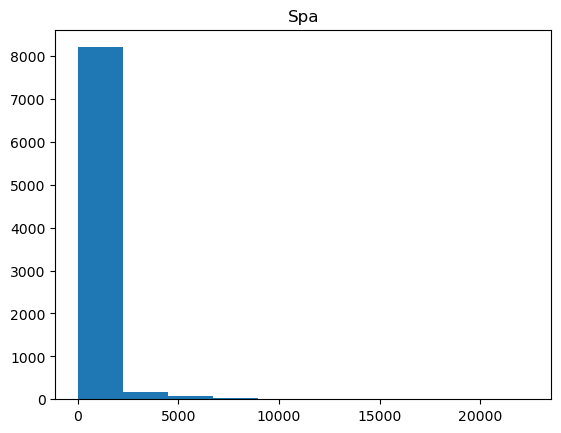

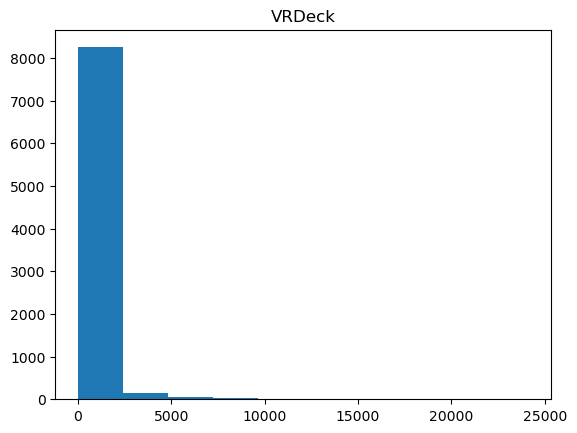

In [101]:
num_features = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
cat_features = ['HomePlanet','CryoSleep','Deck','Side','Destination','VIP']

#Cabin_num feature omitted from here for now

for x in num_features:
    plt.hist(df_train[x])
    plt.title(x)
    #sns.distplot(df_train[x])
    plt.show()

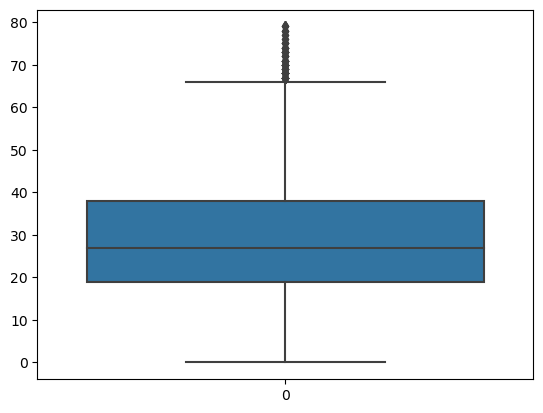

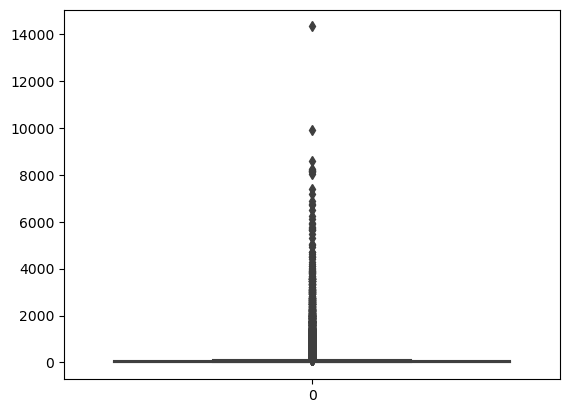

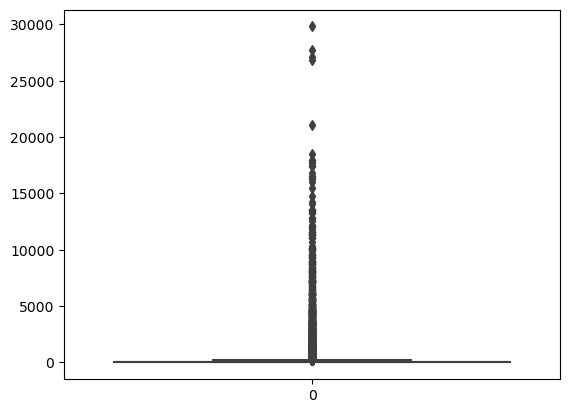

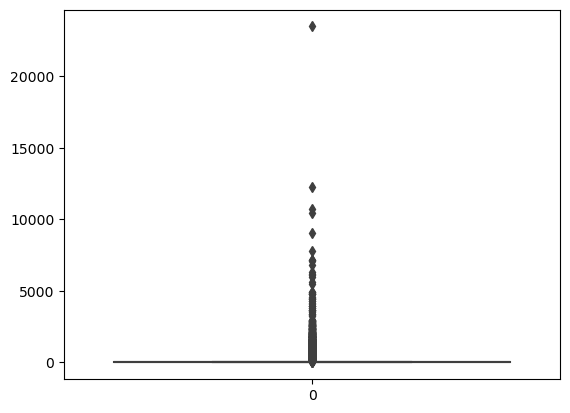

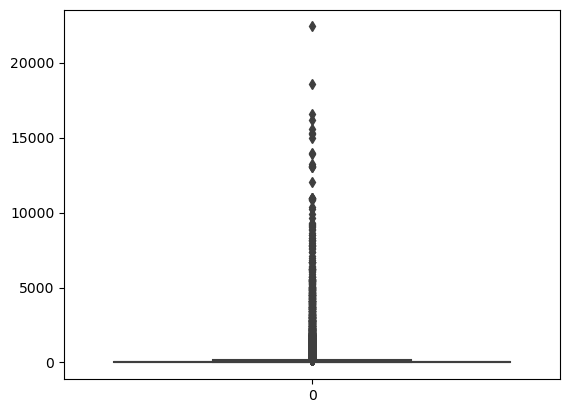

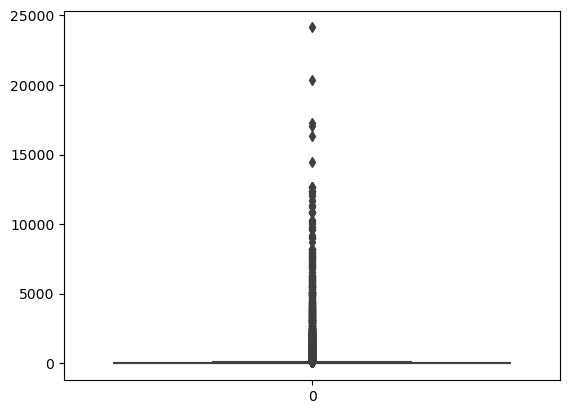

In [102]:
for x in num_features:
    sns.boxplot(df_train[x])
    plt.show()

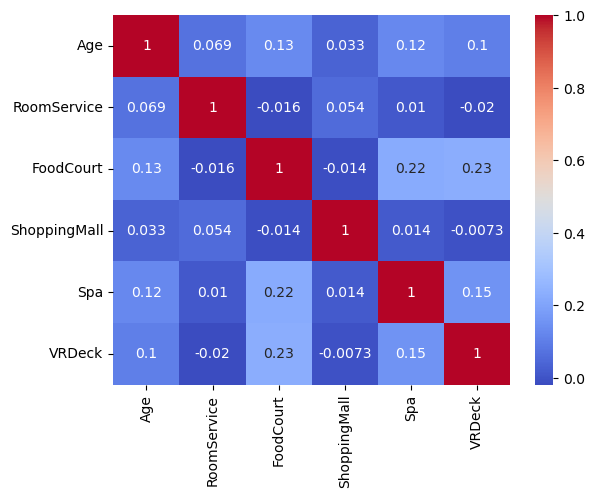

In [103]:
sns.heatmap(df_train[num_features].corr(), annot=True, cmap='coolwarm')
plt.show()

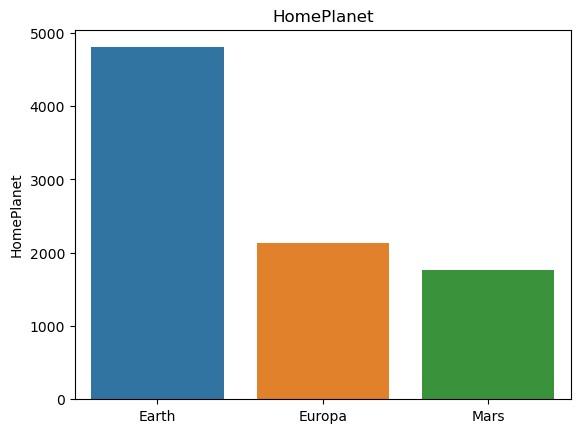

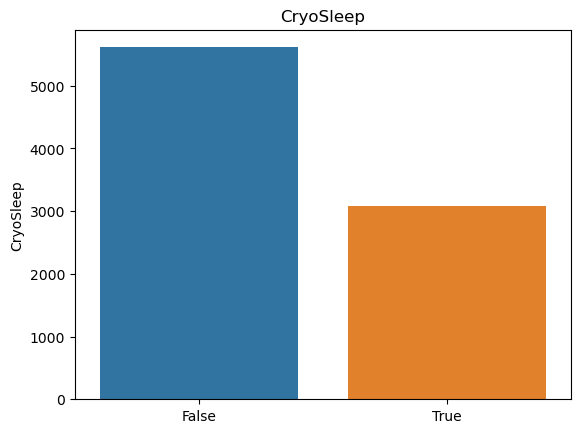

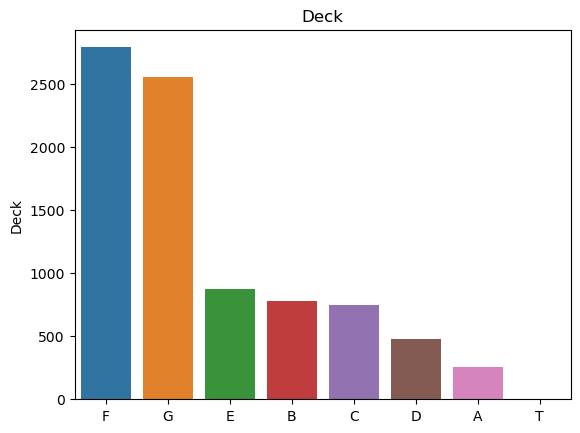

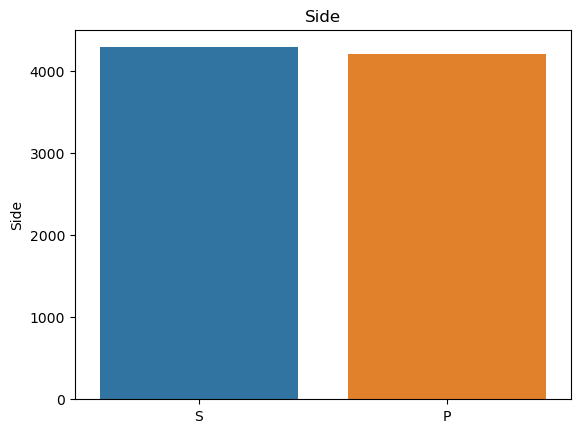

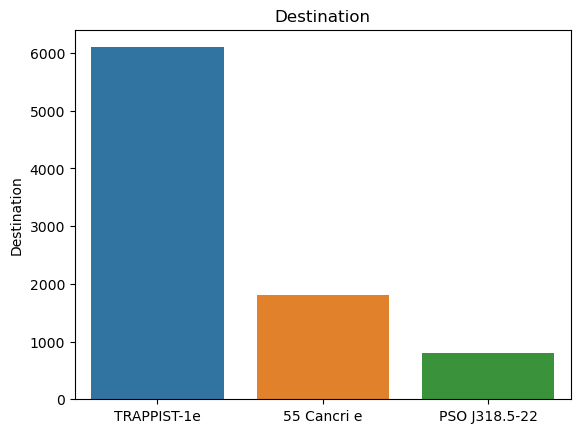

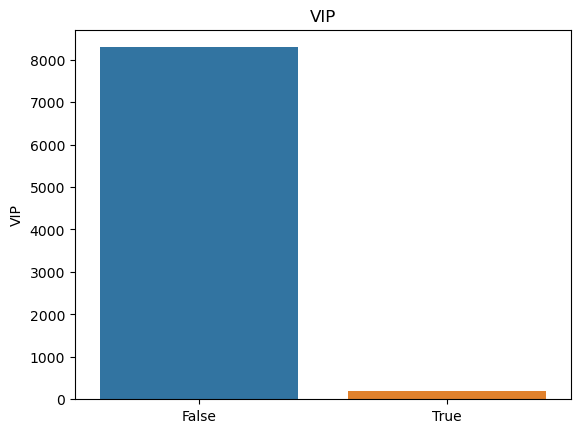

In [104]:
for x in cat_features:
    sns.barplot(x=df_train[x].value_counts().index, y=df_train[x].value_counts()).set_title(x)
#    sns.countplot(df_train[x])
    plt.show()

In [105]:
display(pd.pivot_table(df_train, index='Transported', columns='Deck', values='PassengerId', aggfunc='count'))
display(pd.pivot_table(df_train, index='Transported', columns='Side', values='PassengerId', aggfunc='count'))
display(pd.pivot_table(df_train, index='Transported', columns='CryoSleep', values='PassengerId', aggfunc='count'))
display(pd.pivot_table(df_train, index='Transported', columns='HomePlanet', values='PassengerId', aggfunc='count'))
display(pd.pivot_table(df_train, index='Transported', columns='Destination', values='PassengerId', aggfunc='count'))
display(pd.pivot_table(df_train, index='Transported', columns='VIP', values='PassengerId', aggfunc='count'))

Deck,A,B,C,D,E,F,G,T
Transported,,,,,,,,
False,129,207,239,271,563,1565,1238,4
True,127,572,508,207,313,1229,1321,1


Side,P,S
Transported,,
False,2308,1908
True,1898,2380


CryoSleep,False,True
Transported,,
False,3742,573
True,1872,2506


HomePlanet,Earth,Europa,Mars
Transported,,,
False,2749,727,839
True,2054,1404,920


Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
Transported,,,
False,702,395,3218
True,1098,401,2879


VIP,False,True
Transported,,
False,4093,123
True,4198,76


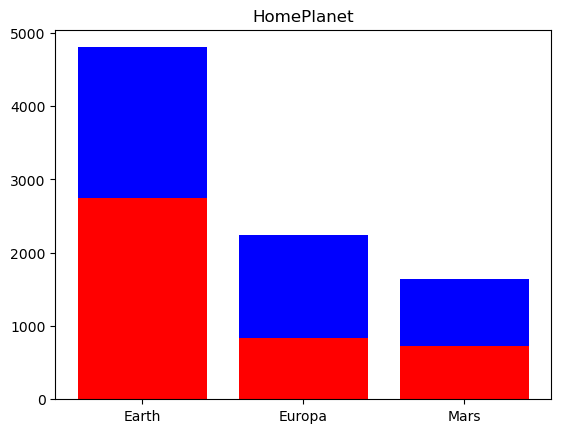

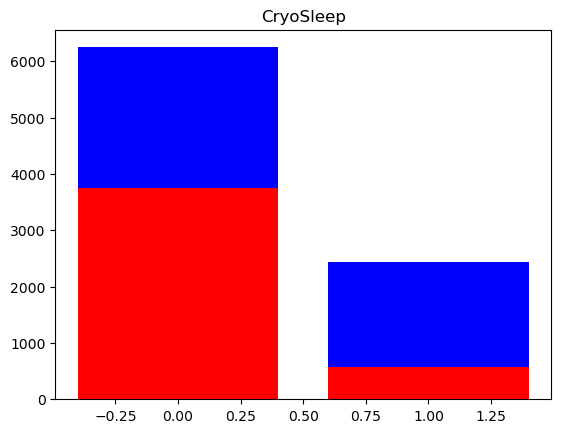

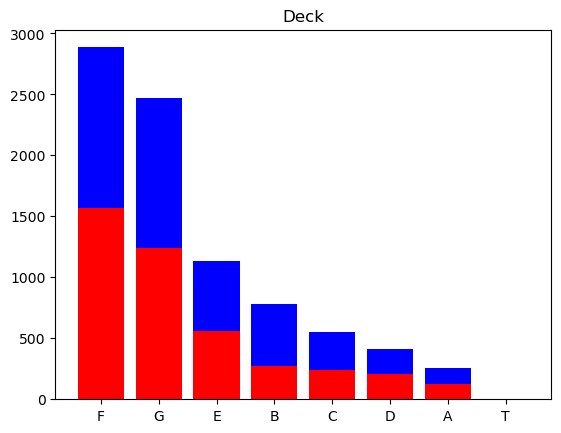

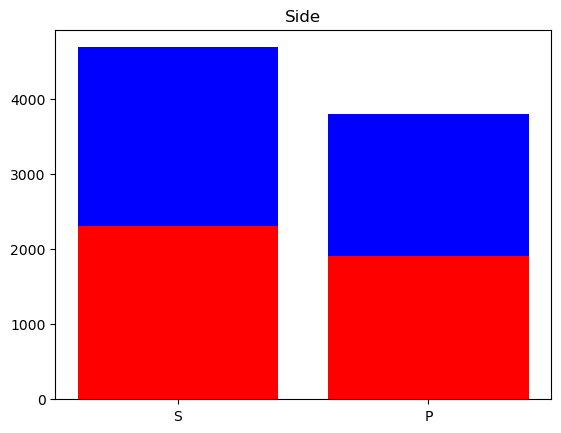

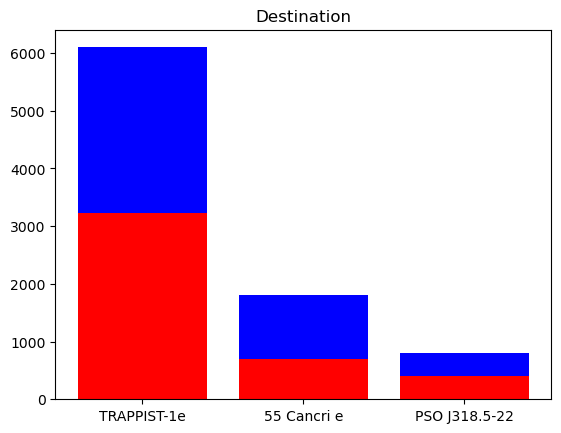

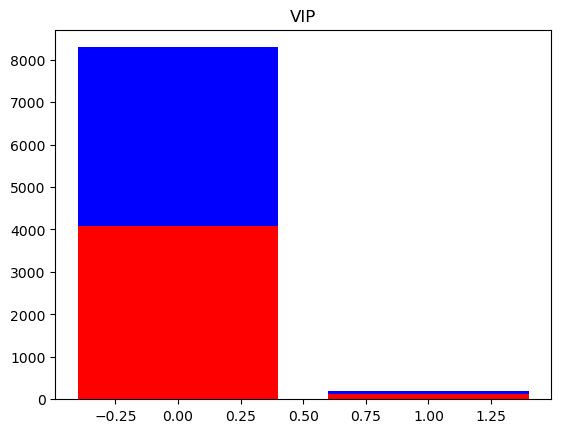

In [106]:
pos = df_train['Transported']==True
neg = df_train['Transported']==False

for x in cat_features:
    #sns.barplot(x=df_train[x].value_counts().index, y=df_train[x].value_counts()).set_title(x)
    plt.bar(df_train[x].value_counts().index, df_train[neg][x].value_counts(), color='r')
    plt.bar(df_train[x].value_counts().index, df_train[pos][x].value_counts(), 
            bottom=df_train[neg][x].value_counts(), color='b')
    plt.title(x)
    plt.show()

# Red => Transported == False, Blue => Transported == True

In [107]:
df_train.groupby(['HomePlanet','Destination','CryoSleep','VIP']).agg({'PassengerId':np.size})

PassengerId
HomePlanet Destination   CryoSleep VIP               
Earth      55 Cancri e   False     False          483
                                   True             1
                         True      False          213
                                   True             1
           PSO J318.5-22 False     False          337
                         True      False          371
           TRAPPIST-1e   False     False         2427
                                   True             3
                         True      False          849
Europa     55 Cancri e   False     False          365
                                   True            49
                         True      False          442
                                   True            14
           PSO J318.5-22 False     True            10
                         True      False            9
           TRAPPIST-1e   False     False          699
                                   True            49
                         True      False          443
                                   True             9
Mars       55 Cancri e   False     False          115
                         True      False           74
           PSO J318.5-22 False     False           29
                                   True             8
                         True      False           10
           TRAPPIST-1e   False     False          858
                                   True            55
                         True      False          567

In [108]:
temp_tr = df_train[(df_train['HomePlanet']=='Europa')].index
temp_te = df_test[(df_test['HomePlanet']=='Europa')].index

for x in temp_tr:
    if(df_train['VIP'][x] is np.nan):
        df_train['VIP'] = True
        
for x in temp_te:
    if(df_test['VIP'][x] is np.nan):
        df_test['VIP'] = True

In [109]:
temp_tr = df_train[(df_train['HomePlanet']=='Mars') & (df_train['Destination']=='PSO J318.5-22')
                  & (df_train['CryoSleep']==False)].index
temp_te = df_test[(df_test['HomePlanet']=='Mars') & (df_test['Destination']=='PSO J318.5-22')
                  & (df_test['CryoSleep']==False)].index

for x in temp_tr:
    if(df_train['VIP'][x] is np.nan):
        df_train['VIP'] = True
        
for x in temp_te:
    if(df_test['VIP'][x] is np.nan):
        df_test['VIP'] = True

In [110]:
temp_tr = df_train[(df_train['HomePlanet']=='Mars') & (df_train['Destination']=='TRAPPIST-1e')
                  & (df_train['CryoSleep']==False)].index
temp_te = df_test[(df_test['HomePlanet']=='Mars') & (df_test['Destination']=='TRAPPIST-1e')
                  & (df_test['CryoSleep']==False)].index

for x in temp_tr:
    if(df_train['VIP'][x] is np.nan):
        df_train['VIP'] = True
        
for x in temp_te:
    if(df_test['VIP'][x] is np.nan):
        df_test['VIP'] = True

In [111]:
df_train['VIP'].fillna(False, inplace=True)
df_test['VIP'].fillna(False, inplace=True)
print(df_train.isna().sum())
print(df_test.isna().sum())

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
Cabin_num       199
Side            199
dtype: int64
PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age              91
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
Deck            100
Cabin_num       100
Side            100
dtype: int64


In [112]:
df_train.groupby(['CryoSleep','VIP','Deck']).agg({'PassengerId':np.size})

PassengerId
CryoSleep VIP  Deck             
False     True A             186
               B             352
               C             443
               D             374
               E             704
               F            2235
               G            1201
               T               5
True      True A              70
               B             427
               C             304
               D             104
               E             172
               F             559
               G            1358

In [113]:
df_train.groupby(['CryoSleep','VIP','Side']).agg({'PassengerId':np.size})

PassengerId
CryoSleep VIP  Side             
False     True P            2765
               S            2735
True      True P            1441
               S            1553

> **Missing Value Treatment**

In [114]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for temp in ['Deck','Side']:
    df_train[[temp]] = imp.fit_transform(df_train[[temp]])
    df_test[[temp]] = imp.fit_transform(df_test[[temp]])
display(df_train.isna().sum())
print('-'*40)
display(df_test.isna().sum())

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck              0
Cabin_num       199
Side              0
dtype: int64

----------------------------------------


PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age              91
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
Deck              0
Cabin_num       100
Side              0
dtype: int64

In [115]:
df_train['Age'].fillna(df_train['Age'].median(),inplace=True)
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)

In [116]:
df_train['Cabin_num'].fillna(df_train['Cabin_num'].median(),inplace=True)
df_test['Cabin_num'].fillna(df_test['Cabin_num'].median(),inplace=True)

In [117]:
for temp in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']:
    df_train[temp].fillna(df_train[temp].mean(),inplace=True)
    df_test[temp].fillna(df_test[temp].mean(),inplace=True)
display(df_train.isna().sum())
print('-'*40)
display(df_test.isna().sum())

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Deck              0
Cabin_num         0
Side              0
dtype: int64

----------------------------------------


PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
Deck              0
Cabin_num         0
Side              0
dtype: int64

In [118]:
age_bins = [-1, 5, 20, 30, 40, 50, 60, 100]
df_train['Age'] = pd.cut(df_train['Age'],
                                       bins=age_bins,
                                       labels=['Infant','Teen','20s', '30s',
                                       '40s', '50s', 'Elderly'])
df_test['Age'] = pd.cut(df_test['Age'],
                                       bins=age_bins,
                                       labels=['Infant','Teen','20s', '30s',
                                       '40s', '50s', 'Elderly'])

In [119]:
cabin_bins = [-1, 300, 600, 900, 1200, 1500, 1800, 2100]
df_train['Cabin_num'] = pd.cut(df_train['Cabin_num'].astype(int),
                                         bins=cabin_bins,
                                         labels=['range1', 'range2', 'range3',
                                         'range4', 'range5', 'range6', 'range7'])
df_test['Cabin_num'] = pd.cut(df_test['Cabin_num'].astype(int),
                                         bins=cabin_bins,
                                         labels=['range1', 'range2', 'range3',
                                         'range4', 'range5', 'range6', 'range7'])

In [120]:
df_train.drop(['PassengerId','Cabin','Name'],axis=1,inplace=True)
df_test.drop(['PassengerId','Cabin','Name'],axis=1,inplace=True)

> **Data Processing**

In [121]:
label = LabelEncoder()
for temp in ['CryoSleep','VIP','Side']:
    df_train[temp] = label.fit_transform(df_train[temp])
    df_test[temp] = label.fit_transform(df_test[temp])
df_train['Transported'] = label.fit_transform(df_train['Transported'])
df_train.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,30s,0,0.0,0.0,0.0,0.0,0.0,0,B,range1,0
1,Earth,0,TRAPPIST-1e,20s,0,109.0,9.0,25.0,549.0,44.0,1,F,range1,1


In [122]:
df_train = pd.get_dummies(data = df_train, columns = ['HomePlanet','Destination','Deck','Age','Cabin_num'])
df_test = pd.get_dummies(data = df_test, columns = ['HomePlanet','Destination','Deck','Age','Cabin_num'])
df_train.head(2)

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,HomePlanet_Earth,...,Age_40s,Age_50s,Age_Elderly,Cabin_num_range1,Cabin_num_range2,Cabin_num_range3,Cabin_num_range4,Cabin_num_range5,Cabin_num_range6,Cabin_num_range7
0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,109.0,9.0,25.0,549.0,44.0,1,1,1,...,0,0,0,1,0,0,0,0,0,0


In [123]:
#temp_1 = df_train.copy()
#temp_2 = df_test.copy()

In [124]:
#df_train = temp_1.copy()
#df_test = temp_2.copy()

In [125]:
"""
age_bins = [-1, 5, 20, 30, 40, 50, 60, 100]
dftrain_clean['age_category'] = pd.cut(dftrain_clean['Age'],
                                       bins=age_bins,
                                       labels=['Infant','Teen','20s', '30s',
                                       '40s', '50s', 'Elderly'])
"""

"\nage_bins = [-1, 5, 20, 30, 40, 50, 60, 100]\ndftrain_clean['age_category'] = pd.cut(dftrain_clean['Age'],\n                                       bins=age_bins,\n                                       labels=['Infant','Teen','20s', '30s',\n                                       '40s', '50s', 'Elderly'])\n"

In [126]:
"""
cabin_bins = [-1, 300, 600, 900, 1200, 1500, 1800, 2100]
dftrain_clean['cabin_category'] = pd.cut(dftrain_clean['cabin_num'].astype(int),
                                         bins=cabin_bins,
                                         labels=['range1', 'range2', 'range3',
                                         'range4', 'range5', 'range6', 'range7'])
"""

"\ncabin_bins = [-1, 300, 600, 900, 1200, 1500, 1800, 2100]\ndftrain_clean['cabin_category'] = pd.cut(dftrain_clean['cabin_num'].astype(int),\n                                         bins=cabin_bins,\n                                         labels=['range1', 'range2', 'range3',\n                                         'range4', 'range5', 'range6', 'range7'])\n"

In [127]:
num_features = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
cat_features = ['HomePlanet','CryoSleep','Deck','Side','Destination','VIP','Age','Cabin_num']


In [128]:
"""
for temp in num_features:
    df_train[temp] = (df_train[temp] - df_train[temp].mean())/df_train[temp].std()
    df_test[temp] = (df_test[temp] - df_test[temp].mean())/df_test[temp].std()
df_train['Age'] = (df_train['Age'] - df_train['Age'].mean())/df_train['Age'].std()
for x in num_features:
"""

for x in num_features:
    df_train[x] = np.log10(df_train[x] + 1)
    df_test[x] = np.log10(df_test[x] + 1)
#df_train['Age'] = (df_train['Age'] - df_train['Age'].mean())/df_train['Age'].std()
#df_test['Age'] = (df_test['Age'] - df_test['Age'].mean())/df_test['Age'].std()
df_train.head()

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,HomePlanet_Earth,...,Age_40s,Age_50s,Age_Elderly,Cabin_num_range1,Cabin_num_range2,Cabin_num_range3,Cabin_num_range4,Cabin_num_range5,Cabin_num_range6,Cabin_num_range7
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,2.041393,1.000000,1.414973,2.740363,1.653213,1,1,1,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1.643453,3.553519,0.000000,3.827111,1.698970,0,1,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0.000000,3.108565,2.570543,3.522444,2.287802,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.482874,1.851258,2.181844,2.752816,0.477121,1,1,1,...,0,0,0,1,0,0,0,0,0,0


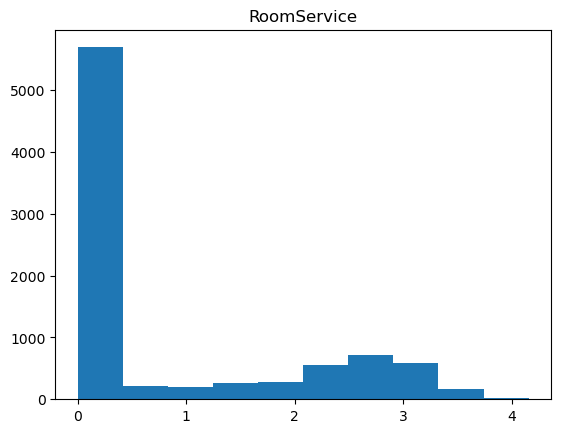

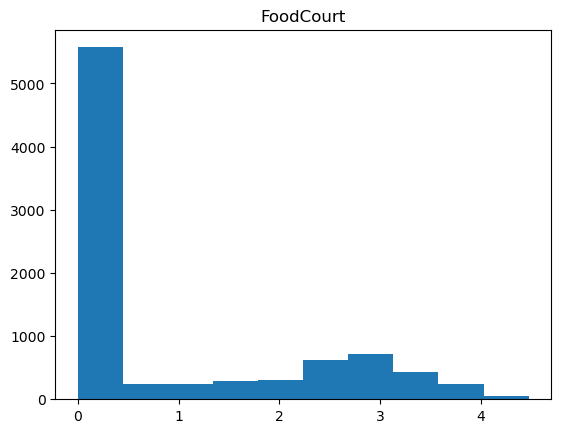

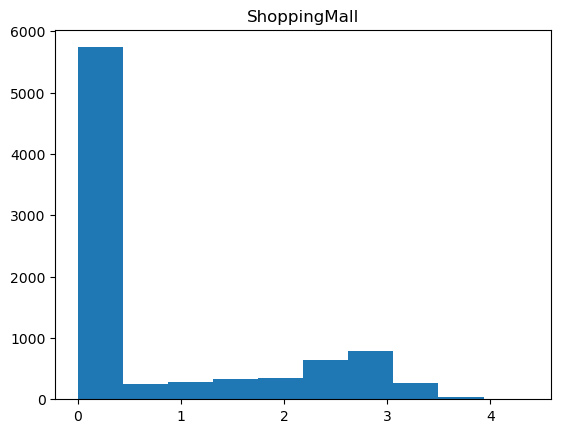

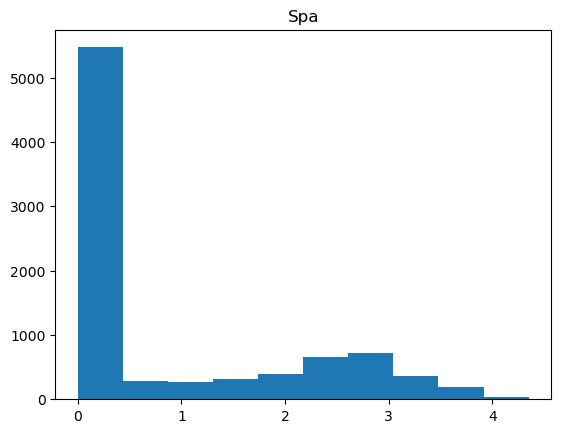

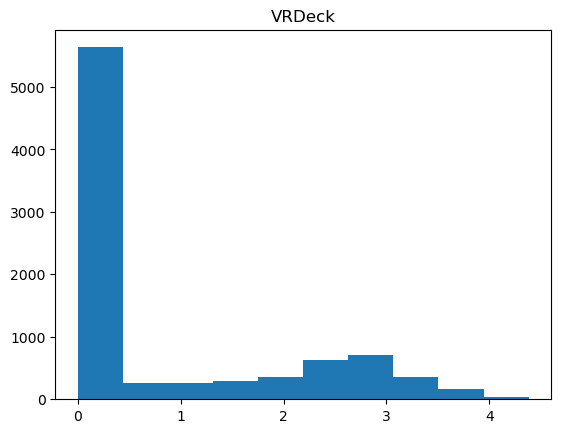

In [129]:
for x in num_features:
    plt.hist(df_train[x])
    plt.title(x)
    plt.show()

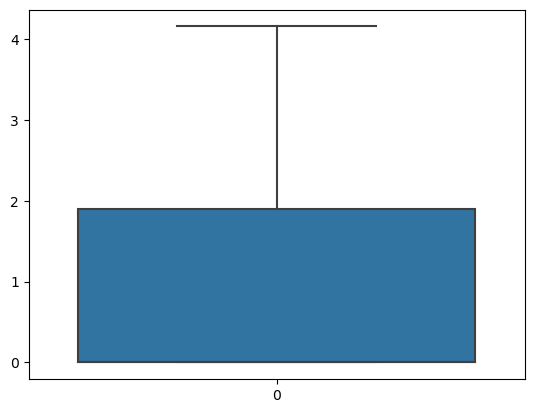

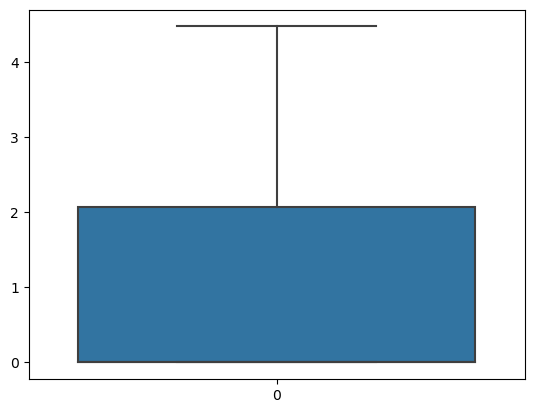

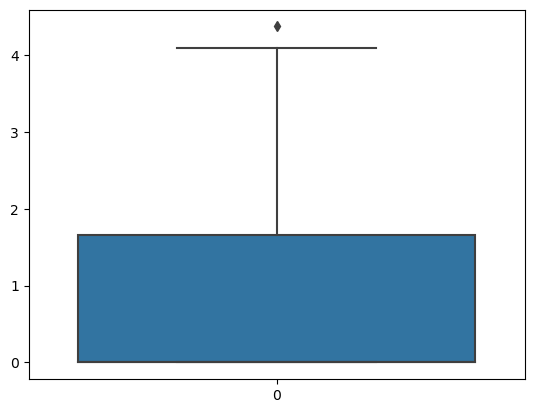

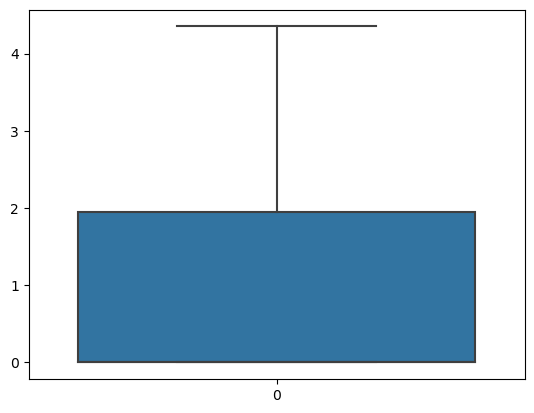

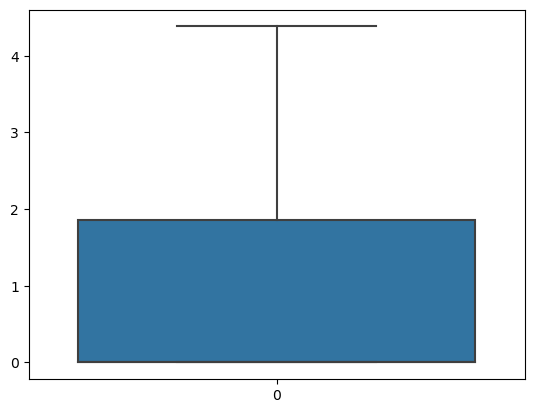

In [130]:
for x in num_features:
    sns.boxplot(df_train[x])
    plt.show()

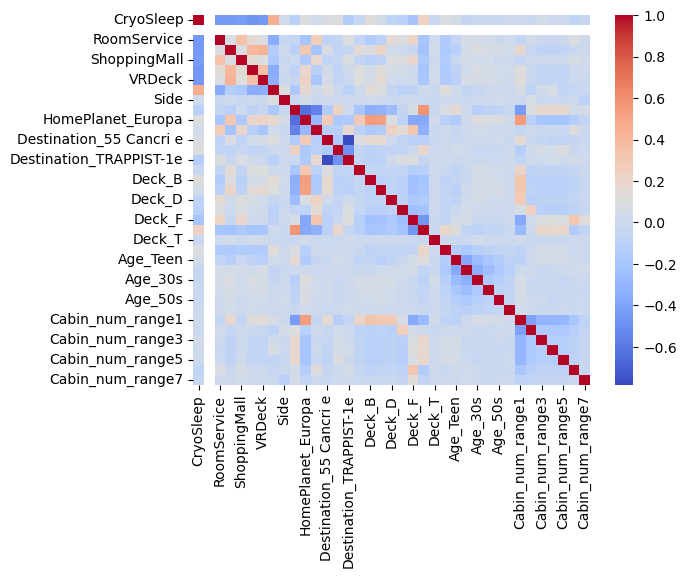

In [132]:
sns.heatmap(df_train.corr(), cmap='coolwarm')
plt.show()

> **Logistic Regression using sklearn**

In [133]:
x_train = df_train.copy()
x_train = x_train.reindex(np.random.permutation(x_train.index))
y_train = x_train.pop('Transported')
x_test = df_test.copy()
#x_test = x_test.reindex(np.random.permutation(x_test.index))

"""
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_pred = np.zeros(x_test.shape[0])
"""

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
#print(y_pred.shape)

(8693, 36)
(4277, 36)
(8693,)


In [134]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [135]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,train_test_split,RandomizedSearchCV, GridSearchCV


In [136]:
def training_perf(model, x_train, y_train):
    model = model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    
    print('Predicted Values: ',y_pred)
    print('-'*50)
    print('Accuracy Score: ',accuracy_score(y_pred,y_train)*100)
    print('-'*50)
    print(classification_report(y_pred, y_train))

In [137]:
models = [['Naive Bayes',GaussianNB()],['Logistic',LogisticRegression(max_iter=200)],['Decision Tree',DecisionTreeClassifier()],
         ['KNN',KNeighborsClassifier()],['Random Forest',RandomForestClassifier()],['SVM',SVC(probability=True)],
          ['XGB',XGBClassifier()]]

In [138]:
for x in models:
    print(x[0],':\n')
    training_perf(x[1],x_train,y_train)
    print('*'*50)

Naive Bayes :

Predicted Values:  [0 1 0 ... 0 1 0]
--------------------------------------------------
Accuracy Score:  75.24444955711492
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      4491
           1       0.73      0.76      0.75      4202

    accuracy                           0.75      8693
   macro avg       0.75      0.75      0.75      8693
weighted avg       0.75      0.75      0.75      8693

**************************************************
Logistic :

Predicted Values:  [0 1 0 ... 1 0 0]
--------------------------------------------------
Accuracy Score:  78.16634073392385
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      4261
           1       0.79      0.78      0.78      4432

    accuracy                           0.78      8693
   macro avg       0.78      

In [140]:
def cross(model,x_train,y_train):
    skfold = StratifiedKFold(n_splits=10)
    results = cross_val_score(model,x_train,y_train,cv=skfold,scoring='f1')
    print('Individual Results: ',results, '\n\n Mean: ', results.mean(), '\n\n Standard Deviation: ',results.std())

In [141]:
for x in models:
    print(x[0],':\n')
    cross(x[1],x_train,y_train)
    print('*'*50)

Naive Bayes :

Individual Results:  [0.72104019 0.75885714 0.76525822 0.70042918 0.74450867 0.72815534
 0.71648873 0.74509804 0.76650943 0.77892325] 

 Mean:  0.7425268199871906 

 Standard Deviation:  0.024108522514428733
**************************************************
Logistic :

Individual Results:  [0.76027397 0.78888889 0.78857143 0.78733032 0.77740113 0.78060046
 0.7627907  0.76244344 0.80586907 0.80941704] 

 Mean:  0.7823586450081695 

 Standard Deviation:  0.016388344191547045
**************************************************
Decision Tree :

Individual Results:  [0.76212471 0.75730337 0.73928158 0.74182638 0.75291375 0.73846154
 0.72116461 0.7347876  0.75229358 0.78241263] 

 Mean:  0.7482569749370713 

 Standard Deviation:  0.01616174706319842
**************************************************
KNN :

Individual Results:  [0.73444976 0.77257143 0.77088305 0.76470588 0.76595745 0.75330927
 0.73820755 0.74641148 0.77974087 0.80236686] 

 Mean:  0.7628603605278066 

 Standar

In [142]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size = 0.2, random_state=42)

In [143]:
votc = VotingClassifier(estimators = [(x,y) for (x,y) in models], voting = 'soft')
training_perf(votc,x_train,y_train)

Predicted Values:  [1 0 1 ... 0 1 1]
--------------------------------------------------
Accuracy Score:  88.12194420477422
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      3330
           1       0.90      0.87      0.88      3624

    accuracy                           0.88      6954
   macro avg       0.88      0.88      0.88      6954
weighted avg       0.88      0.88      0.88      6954



In [144]:
cross(votc,x_train,y_train)

Individual Results:  [0.8141844  0.79773692 0.8        0.78362573 0.77903683 0.77794337
 0.81698389 0.8057971  0.79885057 0.81258941] 

 Mean:  0.7986748224201266 

 Standard Deviation:  0.013655393048995133


In [145]:
def best(model,x_train,x_valid,y_train,y_valid,params):
    grid = GridSearchCV(model,param_grid=params,scoring='f1',n_jobs=-1,cv=10)
    grid = grid.fit(x_train,y_train)
    
    print('Best Parameters: ',grid.best_params_)
    print('\n Best Estimator: ',grid.best_estimator_)
    print('\n Best f1 score: ',grid.best_score_)

    best_model = grid.best_estimator_
    best_models_1.append(best_model)
    best_model = best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_valid)
    print('\n','Validation Set Accuracy: %f'%(accuracy_score(y_pred,y_valid) * 100))
    print('\n',classification_report(y_valid, y_pred))

In [146]:
params = [
    ['Logistic',LogisticRegression(max_iter=200),{'max_iter': [2000],'C': np.logspace(-4,4,20)}],
    ['KNN',KNeighborsClassifier(),{'n_neighbors': [3,5,7,9],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree'],'p':[1,2]}]
]

In [ ]:
"""
Possibilities for svm
{'kernel':['rbf'],'gamma':[.1,.5,1,2,5,10],'C':[.1,1,10,100,1000]}
{'kernel':['linear'],'C':[.1,1,10,100,1000]}
{'kernel':['poly'],'degree':[2,3,4,5],'C':[.1,1,10,100,1000]}
"""

In [147]:
best_models_1 = []

for x in params:
    print(x[0],':\n')
    best(x[1],x_train,x_valid,y_train,y_valid,x[2])
    print('*'*50)

Logistic :

Best Parameters:  {'C': 0.08858667904100823, 'max_iter': 2000}

 Best Estimator:  LogisticRegression(C=0.08858667904100823, max_iter=2000)

 Best f1 score:  0.7813532736630017

 Validation Set Accuracy: 78.090857

               precision    recall  f1-score   support

           0       0.78      0.77      0.78       857
           1       0.78      0.79      0.78       882

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

**************************************************
KNN :

Best Parameters:  {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}

 Best Estimator:  KNeighborsClassifier(algorithm='kd_tree', n_neighbors=9, p=1)

 Best f1 score:  0.7742430810137823

 Validation Set Accuracy: 77.860840

               precision    recall  f1-score   support

           0       0.76      0.81      0.78       857
           1       0.80      0.

In [148]:
best_models_1

[LogisticRegression(C=0.08858667904100823, max_iter=2000),
 KNeighborsClassifier(algorithm='kd_tree', n_neighbors=9, p=1)]

In [149]:
rf_params = {
            'criterion':['entropy','gini'],
            'bootstrap':[True,False],
            'max_depth':[3,5,10,20,50,75,100,None],
            'min_samples_leaf':[1,2,4,10],
            'min_samples_split':[2,5,10]
}

In [ ]:
"""
Possibility for rf:
'n_estimators':[100,500,1000],
'max_features':['auto','sqrt']
"""

In [150]:
xgb_params = {
    'n_estimators':[20,50,100,250,500,1000],
    'colsample_bytree':[0.2,0.5,0.7,0.8,1],
    'max_depth':[2,5,10,15,20,25,None],
    'reg_alpha':[0,0.5,1],
    'reg_lambda':[1,1.5,2],
    'learning_rate':[0.01,0.03,0.1,0.3,1,3,10],
    'subsample':[0.5,0.6,0.7,0.8,0.9],
    'gamma':[0,0.01,0.1,1,10,100],
    'min_child_weight':[0,0.01,0.1,1,10,100],
    'sampling_method':['uniform','gradient_based']
}

In [151]:
def random(model,x_train,x_valid,y_train,y_valid,params):
    rand = RandomizedSearchCV(model,param_distributions=params,scoring='f1',n_iter=100,n_jobs=-1,cv=10,verbose=True)
    rand = rand.fit(x_train,y_train)
    
    print('Best Parameters: ',rand.best_params_)
    print('\n Best Estimator: ',rand.best_estimator_)
    print('\n Best f1 score: ',rand.best_score_)

    best_model = rand.best_estimator_
    best_models_2.append(best_model)
    best_model = best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_valid)
    print('\n','Validation Set Accuracy: %f'%(accuracy_score(y_pred,y_valid) * 100))
    print('\n',classification_report(y_valid, y_pred))

In [152]:
best_models_2 = []

for x in [['Random Forest',RandomForestClassifier(random_state=1),rf_params],
         ['XGB',XGBClassifier(random_state=1),xgb_params]]:
    print(x[0],':\n')
    random(x[1],x_train,x_valid,y_train,y_valid,x[2])
    print('*'*50)

Random Forest :

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters:  {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': True}

 Best Estimator:  RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=1)

 Best f1 score:  0.8073177270473938

 Validation Set Accuracy: 80.621047

               precision    recall  f1-score   support

           0       0.80      0.80      0.80       857
           1       0.81      0.81      0.81       882

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739

**************************************************
XGB :

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters:  {'subsample': 0.7, 'sampling_method': 'uniform', 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 500, 'min_c

In [153]:
best_models_2

[RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                        random_state=1),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=10, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=1, missing=nan, monotone_constraints=None,
               n_estimators=500, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=1, ...)]

> **After finding the best models, now create following Voting Classifiers:**
> 1) KNN, SVC, RF (Soft/Hard) || 
> 2) KNN, RF, LR, SVC (Soft) || 
> 3) KNN, SVC, RF, LR, XGB (Soft)

In [154]:
votc_1 = VotingClassifier(estimators = [('KNN',best_models_1[1]),('SVC',SVC(probability=True)),
                                       ('Random Forest',best_models_2[0])], voting = 'soft')
training_perf(votc_1,x_train,y_train)
cross(votc_1,x_train,y_train)

Predicted Values:  [1 0 1 ... 0 1 1]
--------------------------------------------------
Accuracy Score:  83.44837503595053
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      3443
           1       0.84      0.83      0.84      3511

    accuracy                           0.83      6954
   macro avg       0.83      0.83      0.83      6954
weighted avg       0.83      0.83      0.83      6954

Individual Results:  [0.81971831 0.79776848 0.80567376 0.78311499 0.7864215  0.78143713
 0.82474227 0.81385281 0.79941435 0.82651622] 

 Mean:  0.8038659816649444 

 Standard Deviation:  0.01611867695568184


In [155]:
votc_2 = VotingClassifier(estimators = [('KNN',best_models_1[1]),('SVC',SVC(probability=True)),
                                       ('Random Forest',best_models_2[0])], voting = 'hard')
training_perf(votc_2,x_train,y_train)
cross(votc_2,x_train,y_train)

Predicted Values:  [1 0 1 ... 0 1 1]
--------------------------------------------------
Accuracy Score:  83.50589588725913
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      3363
           1       0.85      0.83      0.84      3591

    accuracy                           0.84      6954
   macro avg       0.83      0.84      0.83      6954
weighted avg       0.84      0.84      0.84      6954

Individual Results:  [0.82681564 0.8038943  0.81179775 0.78285714 0.78382148 0.78939617
 0.82438316 0.81714286 0.80857143 0.82633053] 

 Mean:  0.8075010466914432 

 Standard Deviation:  0.01622966434999197


In [156]:
votc_3 = VotingClassifier(estimators = [('KNN',best_models_1[1]),('SVC',SVC(probability=True)),
                                       ('Random Forest',best_models_2[0]),('Logistic',best_models_1[0])], voting = 'soft')
training_perf(votc_3,x_train,y_train)
cross(votc_3,x_train,y_train)

Predicted Values:  [1 0 1 ... 0 1 1]
--------------------------------------------------
Accuracy Score:  82.74374460742018
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      3440
           1       0.83      0.83      0.83      3514

    accuracy                           0.83      6954
   macro avg       0.83      0.83      0.83      6954
weighted avg       0.83      0.83      0.83      6954

Individual Results:  [0.8185654  0.79888268 0.81586402 0.77858177 0.78076379 0.78157504
 0.82043796 0.80289855 0.80924855 0.82535211] 

 Mean:  0.8032169872958432 

 Standard Deviation:  0.0167831119254441


In [157]:
votc_4 = VotingClassifier(estimators = [('KNN',best_models_1[1]),('SVC',SVC(probability=True)),
                                       ('Random Forest',best_models_2[0]),('Logistic',best_models_1[0]),
                                       ('XGB',best_models_2[1])], voting = 'soft')
training_perf(votc_4,x_train,y_train)
cross(votc_4,x_train,y_train)

Predicted Values:  [1 0 1 ... 0 1 1]
--------------------------------------------------
Accuracy Score:  82.68622375611159
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      3402
           1       0.84      0.82      0.83      3552

    accuracy                           0.83      6954
   macro avg       0.83      0.83      0.83      6954
weighted avg       0.83      0.83      0.83      6954

Individual Results:  [0.82287308 0.80222841 0.8185654  0.78612717 0.79213483 0.78645066
 0.82387191 0.81268012 0.81088825 0.82700422] 

 Mean:  0.8082824050890907 

 Standard Deviation:  0.014843084373150489


In [ ]:
"""
feat_imp = pd.Series(model.feature_importances_, index = x_train.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.show()
"""

In [ ]:
"""
from sklearn.ensemble import VotingClassifier
votc = VotingClassifier(estimators = list of tuples:(name, model), voting = 'hard'/'soft')
cv = cross_val_score(votc, x_train, y_train)
"""

In [158]:
y1_submit = votc_1.predict(x_test)
y2_submit = votc_2.predict(x_test)
y3_submit = votc_3.predict(x_test)
y4_submit = votc_4.predict(x_test)

In [159]:
submit_1 = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
submit_1.drop(['HomePlanet','CryoSleep','Cabin','Destination','Age','VIP','RoomService','FoodCourt',
             'ShoppingMall','Spa','VRDeck','Name'],axis =1,inplace=True)

submit_2 = submit_1.copy()
submit_3 = submit_1.copy()
submit_4 = submit_1.copy()

submit_1['Transported'] = y1_submit.copy()
submit_2['Transported'] = y2_submit.copy()
submit_3['Transported'] = y3_submit.copy()
submit_4['Transported'] = y4_submit.copy()

submit_1['Transported'] = submit_1['Transported'].map({0:False,1:True})
submit_2['Transported'] = submit_2['Transported'].map({0:False,1:True})
submit_3['Transported'] = submit_3['Transported'].map({0:False,1:True})
submit_4['Transported'] = submit_4['Transported'].map({0:False,1:True})

In [ ]:
"""
display(submit_1.head())
display(submit_2.head())
display(submit_3.head())
display(submit_4.head())
"""

In [160]:
submit_1.to_csv('submission_1.csv',index=False)
submit_2.to_csv('submission_2.csv',index=False)
submit_3.to_csv('submission_3.csv',index=False)
submit_4.to_csv('submission_4.csv',index=False)

In [161]:
print(submit_1.dtypes)

PassengerId    object
Transported      bool
dtype: object


In [ ]:
"""
y_submit = votc_2.predict(x_test)
print(x_test.shape,y_submit.shape)
"""

In [ ]:
"""
submit = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
submit.drop(['HomePlanet','CryoSleep','Cabin','Destination','Age','VIP','RoomService','FoodCourt',
             'ShoppingMall','Spa','VRDeck','Name'],axis =1,inplace=True)
submit['Transported'] = y_submit.copy()
submit['Transported'] = submit['Transported'].map({0:False,1:True})
"""

In [ ]:
"""
display(submit.head())
submit.to_csv('submission.csv',index=False)
"""

> **Using tensorflow ensemble models**